# Vista previa del IPC (Índice de Precios al Consumidor)
Este notebook permite explorar los datos procesados del IPC publicados por INDEC, limitados a la región 'Nacional'.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer archivo limpio
df = pd.read_csv('../data/processed/ipc_divisiones_limpio.csv', parse_dates=['fecha'])
df.head()

,fecha,division,variacion_mensual,variacion_interanual,region
0,2016-12-01,NIVEL GENERAL,NaN,NaN,GBA
1,2016-12-01,NIVEL GENERAL,NaN,NaN,Pampeana
2,2016-12-01,NIVEL GENERAL,NaN,NaN,Noreste
3,2016-12-01,NIVEL GENERAL,NaN,NaN,Noroeste
4,2016-12-01,NIVEL GENERAL,NaN,NaN,Cuyo


In [22]:
# Información general
df.info()
df['region'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12852 entries, 0 to 12851
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha                 12852 non-null  datetime64[ns]
 1   division              9282 non-null   object        
 2   variacion_mensual     1267 non-null   float64       
 3   variacion_interanual  1095 non-null   float64       
 4   region                12852 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 502.2+ KB


array(['GBA', 'Pampeana', 'Noreste', 'Noroeste', 'Cuyo', 'Patagonia',
       'Nacional'], dtype=object)

In [23]:
# Filtrar solo registros de región Nacional
df_nacional = df[df['region'] == 'Nacional'].copy()
df_nacional.head()

,fecha,division,variacion_mensual,variacion_interanual,region
6,2016-12-01,NIVEL GENERAL,NaN,NaN,Nacional
13,2016-12-01,Alimentos y bebidas no alcohólicas,NaN,NaN,Nacional
20,2016-12-01,Bebidas alcohólicas y tabaco,NaN,NaN,Nacional
27,2016-12-01,Prendas de vestir y calzado,NaN,NaN,Nacional
34,2016-12-01,"Vivienda, agua, electricidad, gas y otros comb...",NaN,NaN,Nacional


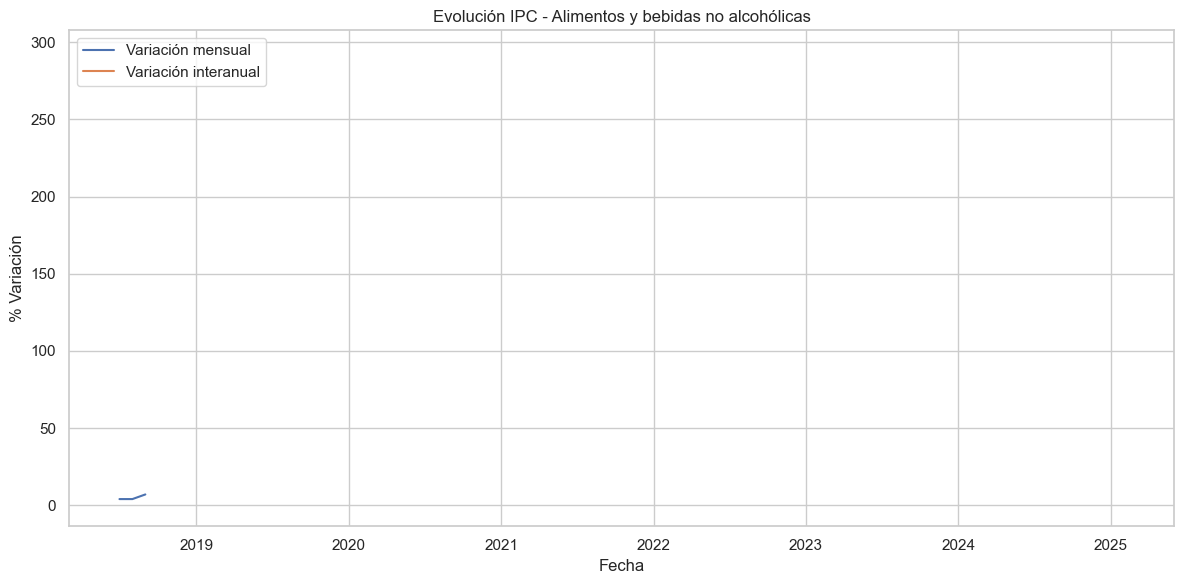

In [24]:
# Gráfico de evolución mensual e interanual de una división específica
division = 'Alimentos y bebidas no alcohólicas'
#division = 'Transporte'
df_plot = df_nacional[df_nacional['division'] == division]

plt.figure(figsize=(12, 6))
plt.plot(df_plot['fecha'], df_plot['variacion_mensual'], label='Variación mensual')
plt.plot(df_plot['fecha'], df_plot['variacion_interanual'], label='Variación interanual')
plt.title(f'Evolución IPC - {division}')
plt.xlabel('Fecha')
plt.ylabel('% Variación')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Estadísticas descriptivas por división
df_nacional.groupby('division')[['variacion_mensual', 'variacion_interanual']].describe()

variacion_mensual  \
                                                               count   
division                                                               
Alimentos y bebidas no alcohólicas                               9.0   
Bebidas alcohólicas y tabaco                                    11.0   
Bienes y servicios varios                                        7.0   
Comunicación                                                     9.0   
Educación                                                       11.0   
Equipamiento y mantenimiento del hogar                          10.0   
NIVEL GENERAL                                                   11.0   
Prendas de vestir y calzado                                     12.0   
Recreación y cultura                                            11.0   
Restaurantes y hoteles                                           5.0   
Salud                                                            6.0   
Transporte                                                       9.0   
Vivienda, agua, electricidad, gas y otros combu...              19.0   

                                                                             \
                                                        mean       std  min   
division                                                                      
Alimentos y bebidas no alcohólicas                  4.444444  1.943651  1.0   
Bebidas alcohólicas y tabaco                        5.363636  5.661673  1.0   
Bienes y servicios varios                           2.571429  1.133893  2.0   
Comunicación                                        3.333333  2.783882  0.0   
Educación                                           1.818182  1.721522  0.0   
Equipamiento y mantenimiento del hogar              3.600000  2.590581  1.0   
NIVEL GENERAL                                       5.181818  2.442056  2.0   
Prendas de vestir y calzado                         4.750000  3.441062 -1.0   
Recreación y cultura                                5.727273  6.420139  1.0   
Restaurantes y hoteles                              4.800000  4.266146  1.0   
Salud                                               4.500000  4.230839 -2.0   
Transporte                                          5.111111  3.100179  3.0   
Vivienda, agua, electricidad, gas y otros combu...  3.894737  3.413938  0.0   

                                                                           \
                                                     25%  50%   75%   max   
division                                                                    
Alimentos y bebidas no alcohólicas                  3.00  4.0  6.00   7.0   
Bebidas alcohólicas y tabaco                        3.00  3.0  5.50  21.0   
Bienes y servicios varios                           2.00  2.0  2.50   5.0   
Comunicación                                        1.00  3.0  5.00   8.0   
Educación                                           1.00  1.0  2.00   5.0   
Equipamiento y mantenimiento del hogar              1.00  3.5  5.75   8.0   
NIVEL GENERAL                                       4.00  4.0  6.00  11.0   
Prendas de vestir y calzado                         2.75  4.5  6.00  11.0   
Recreación y cultura                                2.50  4.0  5.00  24.0   
Restaurantes y hoteles                              3.00  3.0  5.00  12.0   
Salud                                               2.50  4.5  8.00   9.0   
Transporte                                          4.00  4.0  5.00  13.0   
Vivienda, agua, electricidad, gas y otros combu...  2.00  3.0  5.00  14.0   

                                                   variacion_interanual  \
                                                                  count   
division                                                                  
Alimentos y bebidas no alcohólicas                                  9.0   
Bebidas alcohólicas y tabaco                                        8.0   
Bienes y servicios varios